In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import time
import pandas as pd

## Fonctions utiles:

In [2]:
def S(y,x, a):
    return float((y-a.dot(x.T))**2)


def gradS(y,x, a):
    S = []
    for p in range(a.size):
        aux = 0
        aux -= float(x[0][p]) * (y - float(a.dot(x.T)))
        S.append(aux)
    return S


def perte_quadr(M, MM):
    p = 0
    n, m = M.shape
    for i in range(n):
        for j in range(m):
            p += (M[i][j] - MM[i][j]) ** 2
    return p

## Paramètres: 

In [3]:
pas = .1
eps = 0.01
iter=10
l=3 #facteurs latents

## Algorithme: 

On utilise le même principe que pour approcher un scalaire par un produit de vecteurs sauf qu'ici on le fait pour chaque coefficient de la matrice. 
On prend les coefficients dans un ordre aléatoire, et pour ne pas que les coefficients tirés à la fin soient trop avantagés, ont diminue le pas à chaque étape!
Enfin on fait passer la matrice entière par ce processus un nombre "iter" de fois et on trace l'erreur quadratique (totale, pas moyenne) au fil des étapes.

In [4]:
def mon_idee(M,l,iter,pas,eps,courbes_seulement):
    #le paramètre courbe_seulement c'est si on veut afficher toutes les étapes ou juste les courbes pour comparer les résultats
    etape , perte_etape, temps, perte_temps = [],[],[],[]
    
    #Initialisation des matrices de la factorisation
    MAT_U=np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V=np.array([[.1 for k in range(l)]for k in range(M.shape[1])])
    
    #Prendre les coefficient dans 
    L1=[ k for k in range(M.shape[0])]
    L2=[ k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)
    
    if (courbes_seulement ==False):
        print("Matrice à factoriser :" )
        print(M)

    debut=time.time()

    for ww in range(iter):
        pas/=1.1
    
        for n in L1:
            for m in L2:

                a=float(M[n][m])
                U=MAT_U[n:n+1]
                V=MAT_V[m:m+1]
                e , ee = 0, 0

                #On minismise sur V à U constant
                while (max(gradS(a, U, V)) > eps) or (min(gradS(a, U, V)) < -eps):
                    e +=  1
                    for i in range(l):
                        p1=perte_quadr(M,MAT_U.dot(MAT_V.T))
                        grad = gradS(a, U, V)[i]
                        V[0][i] -= pas * grad
                        p2=perte_quadr(M,MAT_U.dot(MAT_V.T))
                        if (p1<p2):
                            V[0][i] += pas * grad

                    if e > 30:
                        MAT_V[m] = V
                        break
                    temps.append(time.time()-debut)
                    perte_temps.append(min(p1,p2))
            
                #On minimise sur U à V constant
                while (max(gradS(a, V, U)) > eps) or (min(gradS(a, V, U)) < -eps) :
                    ee += 1
                    for i in range(l):
                        p1 = perte_quadr(M, MAT_U.dot(MAT_V.T))
                        grad = gradS(a, V, U)[i]
                        U[0][i] -= pas * grad
                        p2 = perte_quadr(M, MAT_U.dot(MAT_V.T))
                        if (p1 < p2):
                            U[0][i] += pas * grad

                    if ee > 30:
                        MAT_U[n] = U
                        break
                    temps.append(time.time()-debut)
                    perte_temps.append(min(p1,p2))
                    
        if (courbes_seulement ==False):
            print("etape" , ww+1, "sur", iter)
        etape.append(ww)
        perte_etape.append(perte_quadr(M, MAT_U.dot(MAT_V.T)))
    
    fin=time.time()
    if (courbes_seulement ==False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM=MAT_U.dot(MAT_V.T)
    print ("perte = ", perte_quadr(M, MM) )
    print("temps d'execution : " , fin-debut, "secondes.")
    plt.plot(etape,perte_etape)
    plt.title("erreur par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    plt.plot(temps,perte_temps)
    plt.title("erreur en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale")
    plt.show()
    
    #pour l'étude de l'impact des paramètres : 
    if (courbes_seulement==True):
        return {"temps":fin-debut, "erreur":perte_quadr(M, MM)}

Matrice à factoriser :
[[5 1 4 5]
 [4 2 5 3]
 [2 4 2 4]]
etape 1 sur 10
etape 2 sur 10
etape 3 sur 10
etape 4 sur 10
etape 5 sur 10
etape 6 sur 10
etape 7 sur 10
etape 8 sur 10
etape 9 sur 10
etape 10 sur 10
[[5.00084161 1.00489087 4.00417461 4.98835247]
 [3.99219345 1.98820723 4.99002364 3.06086678]
 [2.00465714 4.00933894 2.00898423 3.98930451]]
[[5 1 4 5]
 [4 2 5 3]
 [2 4 2 4]]
perte =  0.004486039694076529
temps d'execution :  1.8743982315063477 secondes.


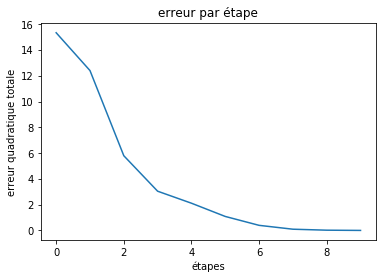

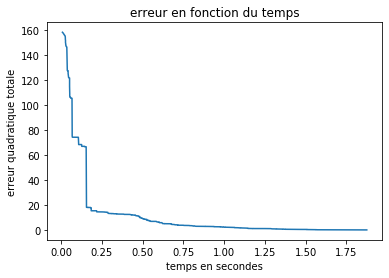

Matrice à factoriser :
[[5 5 3 5 3 1 5 2 3 5 2 3]
 [3 5 5 4 1 1 2 4 2 2 4 1]
 [3 5 3 1 4 2 4 1 1 1 4 4]
 [4 2 1 4 3 4 4 2 1 3 2 2]
 [3 2 3 2 5 5 4 5 3 2 5 5]
 [1 1 4 4 5 3 5 2 5 1 1 5]]
etape 1 sur 10
etape 2 sur 10
etape 3 sur 10
etape 4 sur 10
etape 5 sur 10
etape 6 sur 10
etape 7 sur 10
etape 8 sur 10
etape 9 sur 10
etape 10 sur 10
[[4.69074165 4.89256692 3.63135474 5.69597867 2.80286077 1.38534253
  4.8867667  2.1194219  3.00579352 4.35115722 1.95952887 2.57008545]
 [3.77832849 5.61238887 3.75100267 2.88436306 1.61795916 0.86961674
  2.62985047 2.72697455 1.13780472 2.51354004 4.0352172  1.68489866]
 [2.16714035 4.27562077 4.13983407 1.71714365 3.3018418  1.68168949
  3.16307256 2.51166807 2.24242706 0.88531421 3.98767679 3.61330988]
 [3.7598926  1.64016598 1.23607988 3.90003427 2.73369674 3.480546
  3.59178147 2.8411452  1.74041197 3.41336826 2.0228117  2.09803525]
 [3.06956007 2.21195337 2.98417105 2.21445832 5.14701666 5.38559695
  4.27158159 4.49128656 2.51807932 1.64409349 4.9

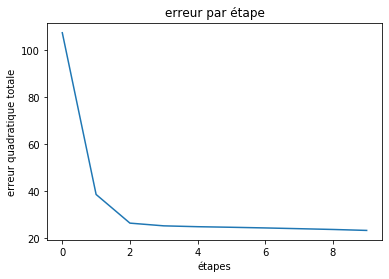

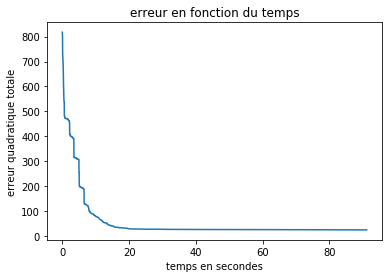

In [5]:
M1=rd.randint(1, 6, (3, 4))
M2=rd.randint(1,6,(6,12))

mon_idee(M1,l,iter,pas,eps,False)
mon_idee(M2,l+1,iter,pas,eps,False)

L'erreur est comme attendue une fonction décroissante du temps et du nombre d'étapes. 
On remarque cependant que l'erreur est stagnante pendant certaines périodes. Cela s'explique car on change les valeurs des matrices $U$ et $V$ dans le but d'approcher un coefficient uniquement si ce changement induit une diminution de l'erreur quadratique totale calculée sur tous les coefficients de la matrice. Ce n'est pas forcément le cas : en effet, l'optimisation par descente de gradient va diminuer l'erreur dans l'approximation de ce coefficient (voir notebook sur l'approximation d'un scalaire par un produit de vecteur) mais peut augmenter l'erreur dans l'approximation d'autres coefficients, à savoir ceux sur la même ligne ou colonne que le coefficient sur lequel on travail. 
On comprend alors qu'une amélioration possible de l'algorithme consiste à calculer l'erreur quadratique sur la ligne et sur la colonne du coefficient concerné et non plus sur toute la martrice!

## Comparaison de performances pour différents paramètres : 

### Facteurs latents:

Pour une même matrice $M$ à approcher, comparons l'impact du nombre de facteurs latents sur les performances.

#### Pour une petite matrice : matrice $3\times 4$ :

[[4 1 1 4]
 [1 3 3 2]
 [1 2 3 3]]
Pour  1 facteurs latents :
perte =  12.371941309193103
temps d'execution :  1.6757445335388184 secondes.


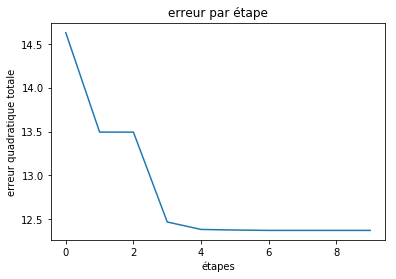

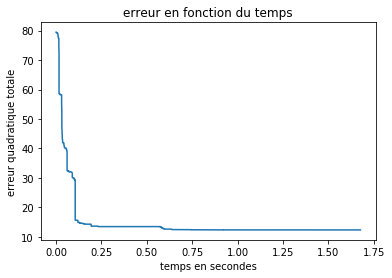

Pour  2 facteurs latents :
perte =  0.7208267763297744
temps d'execution :  2.802238941192627 secondes.


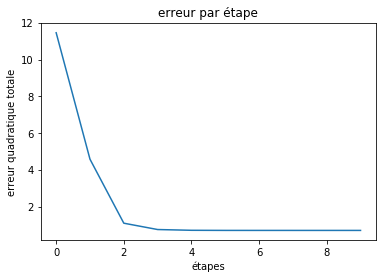

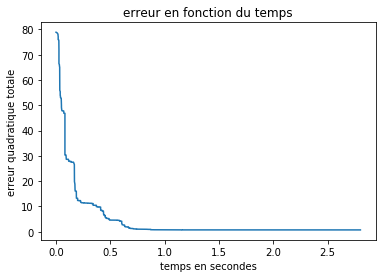

Pour  3 facteurs latents :
perte =  0.0017548868449859918
temps d'execution :  3.522911787033081 secondes.


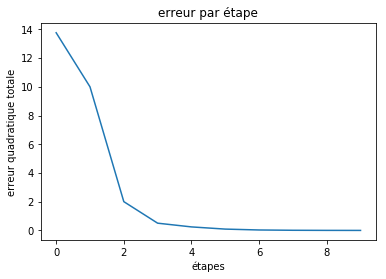

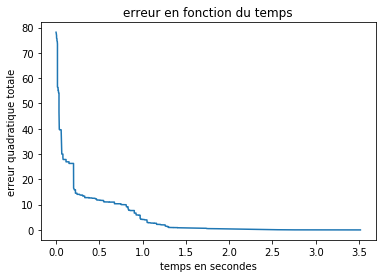

Pour  4 facteurs latents :
perte =  0.00042582272868528997
temps d'execution :  4.672860860824585 secondes.


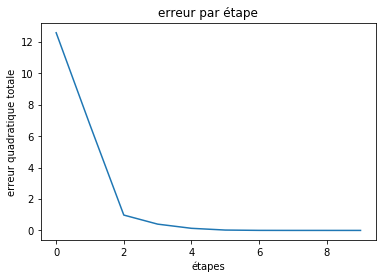

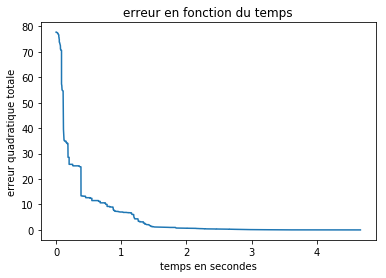

Pour  5 facteurs latents :
perte =  0.0001753962180240867
temps d'execution :  4.75896692276001 secondes.


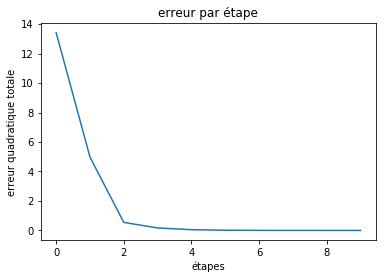

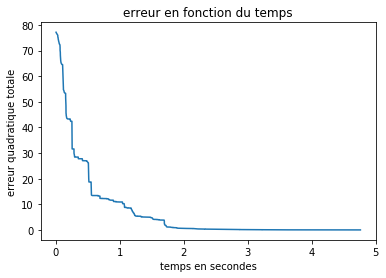

Pour  6 facteurs latents :
perte =  0.0003182609251896198
temps d'execution :  6.380617618560791 secondes.


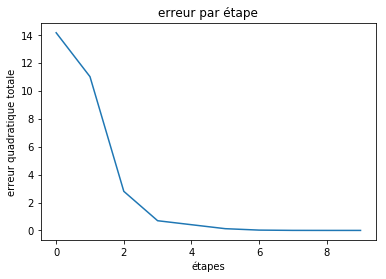

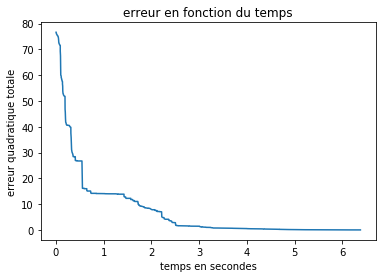

Pour  7 facteurs latents :
perte =  0.0004973512511267665
temps d'execution :  7.501779556274414 secondes.


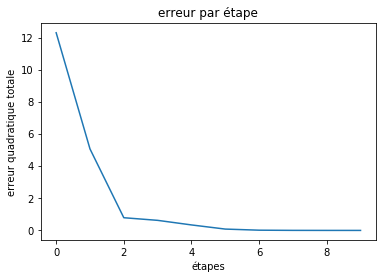

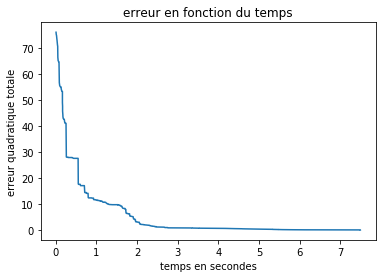

Pour  8 facteurs latents :
perte =  0.0003948137731491419
temps d'execution :  7.6162190437316895 secondes.


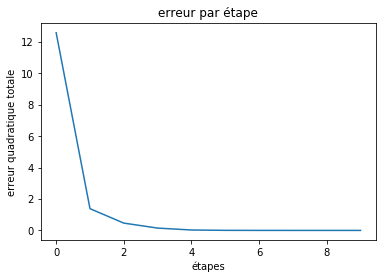

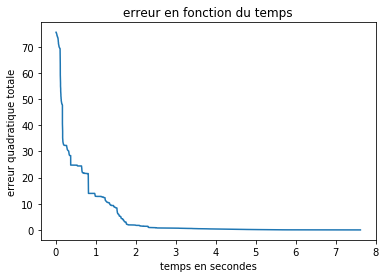

Pour  9 facteurs latents :
perte =  0.00035747207339012813
temps d'execution :  7.9030845165252686 secondes.


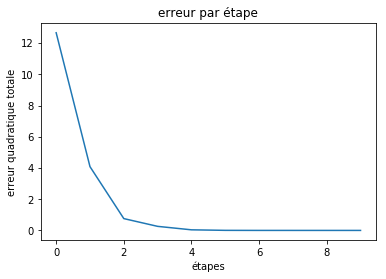

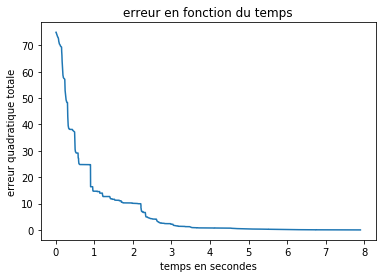

Pour  10 facteurs latents :
perte =  0.00037124093327325393
temps d'execution :  10.454924821853638 secondes.


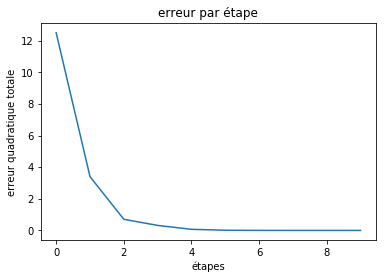

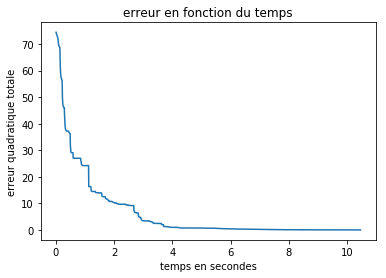

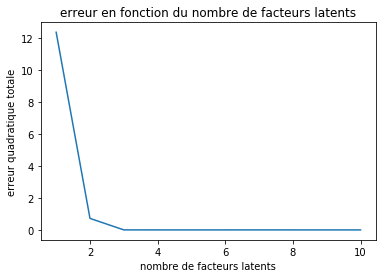

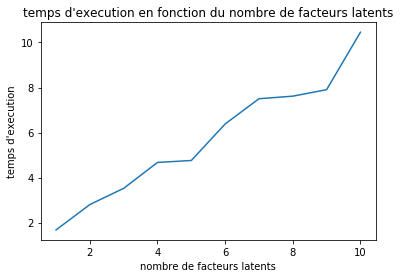

In [7]:
M=rd.randint(1,6,(3,4))
print(M)
iter=10
pas=.1
eps=.01
erreur, temps, l=[],[],[]
for latent in range (1,11):
    print("Pour " , latent, "facteurs latents :")
    dict=mon_idee(M,latent,iter,pas,eps,True)
    l.append(latent)
    erreur.append(dict.get("erreur"))
    temps.append(dict.get("temps"))

plt.plot(l,erreur)
plt.title("erreur en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("erreur quadratique totale")
plt.show()

plt.plot(l,temps)
plt.title("temps d'execution en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("temps d'execution")
plt.show()
    

Regardons maintenant le cas d'une martrice plus grande $100$ éléments par exemple, une matrice $20\times 5$.

[[1 2 4 1 2]
 [5 4 4 1 5]
 [4 5 5 1 4]
 [4 3 2 1 5]
 [1 1 1 2 3]
 [1 3 4 3 1]
 [2 2 1 4 2]
 [3 2 4 5 5]
 [1 3 4 5 5]
 [2 3 2 1 3]
 [1 2 1 5 1]
 [3 2 2 5 4]
 [3 1 3 5 1]
 [1 2 1 5 1]
 [5 3 3 5 5]
 [2 3 2 3 1]
 [3 5 2 1 2]
 [5 1 3 5 4]
 [4 1 5 1 3]
 [4 3 1 4 4]]
Pour  1 facteurs latents :
perte =  157.21071591832515
temps d'execution :  58.947508573532104 secondes.


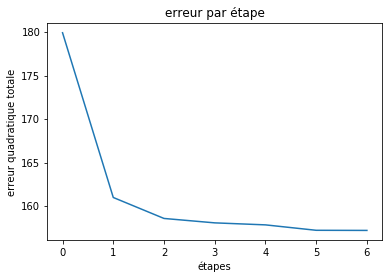

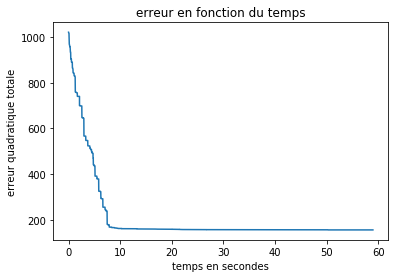

Pour  2 facteurs latents :
perte =  76.0438276539452
temps d'execution :  113.38555693626404 secondes.


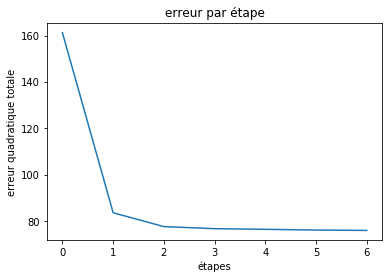

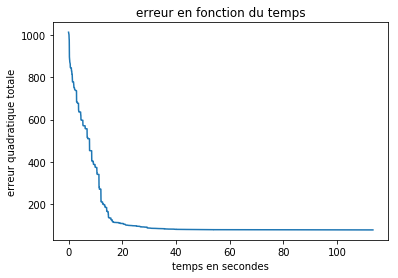

Pour  3 facteurs latents :
perte =  45.96212972005936
temps d'execution :  89.5457079410553 secondes.


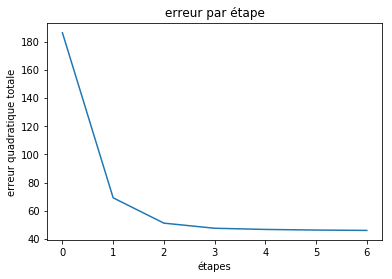

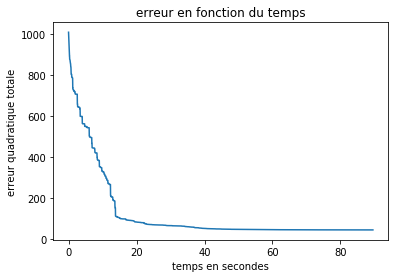

Pour  4 facteurs latents :
perte =  18.308756870836874
temps d'execution :  105.38327860832214 secondes.


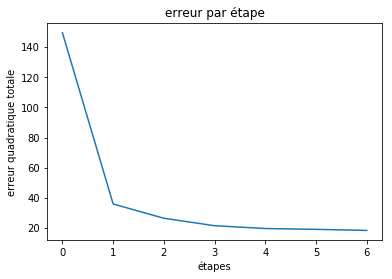

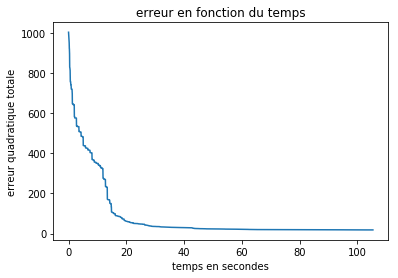

Pour  5 facteurs latents :
perte =  0.0014995859994841013
temps d'execution :  77.6145384311676 secondes.


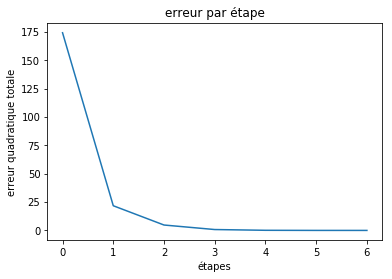

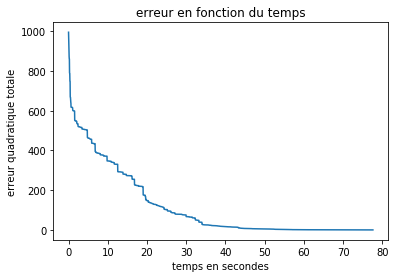

Pour  6 facteurs latents :
perte =  0.0006871673714680527
temps d'execution :  94.07291078567505 secondes.


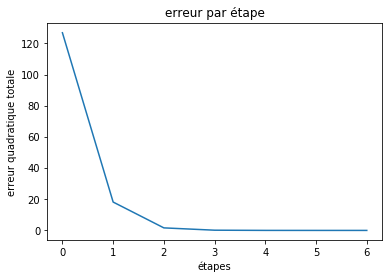

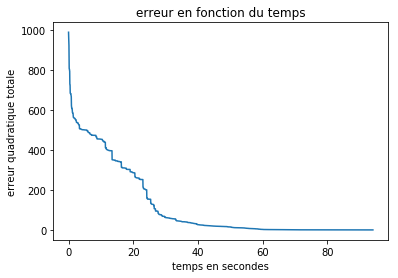

Pour  7 facteurs latents :
perte =  0.00019917948874400643
temps d'execution :  82.17470645904541 secondes.


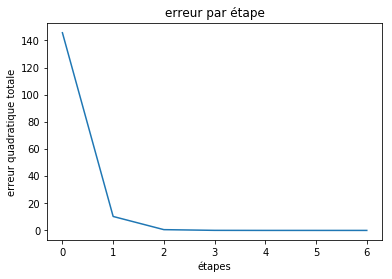

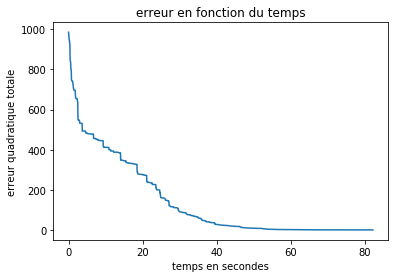

Pour  8 facteurs latents :
perte =  0.00026381156993757107
temps d'execution :  89.03821897506714 secondes.


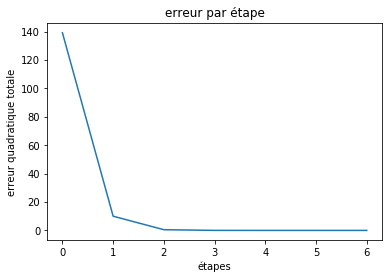

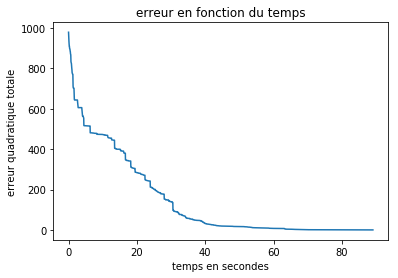

Pour  9 facteurs latents :
perte =  0.00020924347352889637
temps d'execution :  108.8783974647522 secondes.


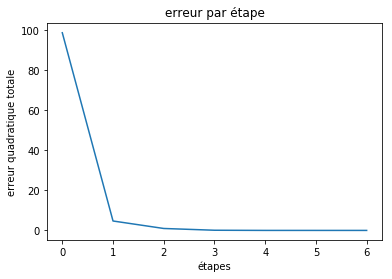

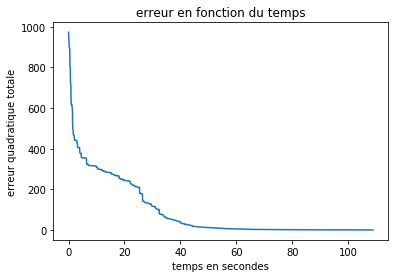

Pour  10 facteurs latents :
perte =  0.00020273536653913924
temps d'execution :  93.92160773277283 secondes.


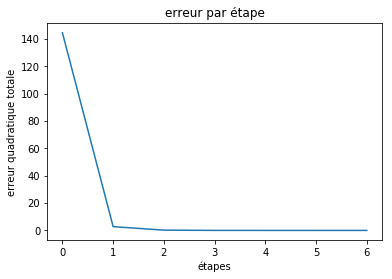

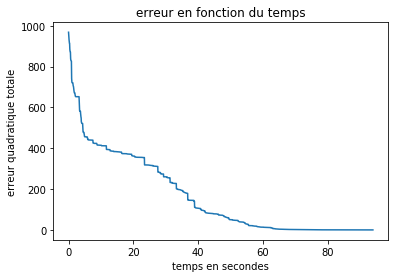

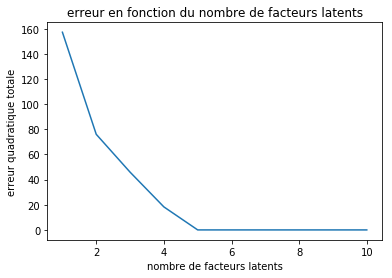

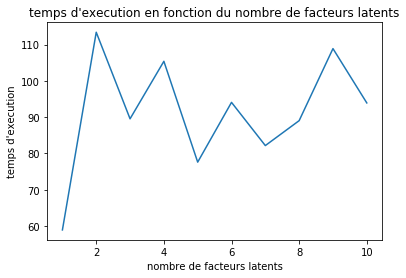

In [8]:
M=rd.randint(1,6,(20,5))
print(M)
iter=7
pas=.1
eps=.01
erreur, temps, l=[],[],[]
for latent in range (1,11):
    print("Pour " , latent, "facteurs latents :")
    dict=mon_idee(M,latent,iter,pas,eps,True)
    l.append(latent)
    erreur.append(dict.get("erreur"))
    temps.append(dict.get("temps"))

plt.plot(l,erreur)
plt.title("erreur en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("erreur quadratique totale")
plt.show()

plt.plot(l,temps)
plt.title("temps d'execution en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("temps d'execution")
plt.show()

Pour une matrice à 100 éléments je n'ai quasiment pas d'erreur. Très bizarre que j'ai une erreur pas dégueu mais non négligeable pour une matrice de 500 éléments.

Pour une très grande matrice (500 elements)

[[4 5 2 3 1 1 3 4 3 1]
 [3 2 2 2 5 2 1 5 1 4]
 [1 5 1 4 3 1 1 1 5 4]
 [3 1 4 3 5 1 3 2 4 5]
 [4 4 2 1 3 3 1 1 2 4]
 [3 2 2 5 4 5 5 5 1 4]
 [2 1 1 3 3 5 2 2 4 1]
 [4 3 4 5 5 5 5 2 2 2]
 [4 4 3 1 2 5 4 3 4 2]
 [1 5 4 4 2 2 1 4 4 3]
 [3 4 5 4 5 5 3 2 5 4]
 [2 3 2 2 1 5 1 3 3 5]
 [4 4 1 1 1 3 4 5 2 3]
 [4 5 5 2 5 4 3 4 5 2]
 [3 1 5 4 5 2 5 5 3 5]
 [4 5 5 4 5 2 1 3 3 2]
 [4 5 3 3 1 2 3 2 2 5]
 [3 5 5 5 3 4 5 5 3 4]
 [1 2 4 5 1 4 1 4 5 2]
 [4 1 1 1 3 1 5 5 3 3]
 [3 5 5 3 2 4 4 2 5 3]
 [5 2 1 3 3 1 2 3 5 4]
 [1 5 2 2 1 5 5 3 2 4]
 [3 2 2 5 3 5 1 3 3 2]
 [2 5 2 1 3 1 5 3 1 2]
 [5 1 3 4 2 4 3 3 3 3]
 [1 5 2 2 3 3 3 2 4 4]
 [3 2 5 4 5 5 5 4 1 3]
 [1 2 4 3 3 4 2 4 3 1]
 [1 2 3 4 4 5 1 3 3 2]
 [4 5 5 2 2 2 1 2 3 3]
 [5 2 3 1 4 1 3 3 1 2]
 [5 2 2 4 1 3 2 4 5 5]
 [1 4 2 3 5 5 3 2 1 1]
 [1 4 3 2 1 2 2 1 5 3]
 [3 5 5 1 1 2 4 2 5 2]
 [1 5 4 1 3 4 3 5 3 1]
 [1 5 3 1 4 4 3 2 1 5]
 [5 5 2 3 1 1 4 5 2 4]
 [4 1 4 3 1 2 4 5 1 4]
 [3 3 2 4 1 2 1 5 1 3]
 [1 3 5 4 1 1 4 4 5 2]
 [4 5 5 2 1 3 4 1 4 1]
 [3 1 4 5 4

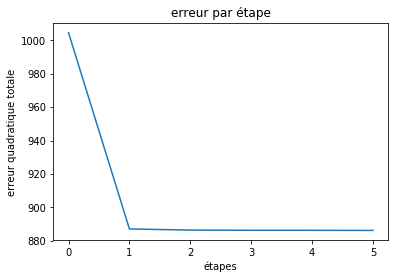

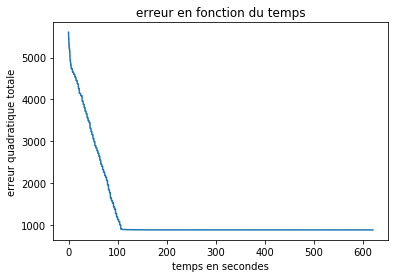

Pour  2 facteurs latents :
perte =  707.5667615359465
temps d'execution :  2544.483193397522 secondes.


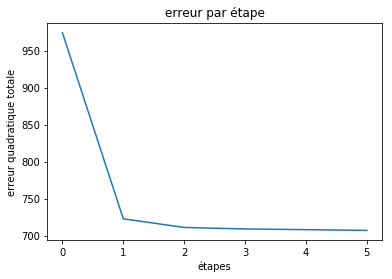

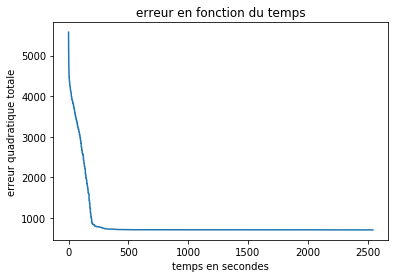

Pour  3 facteurs latents :
perte =  547.100314353234
temps d'execution :  1839.0953159332275 secondes.


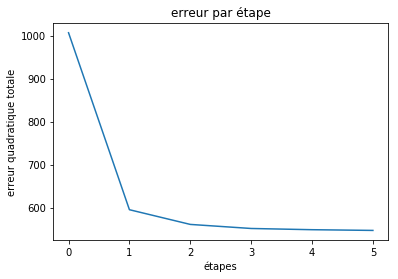

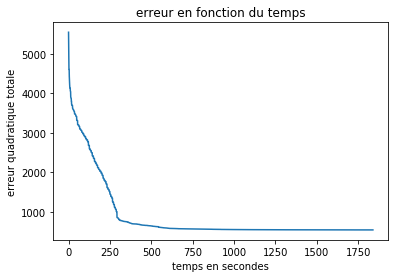

Pour  4 facteurs latents :
perte =  415.61305357951784
temps d'execution :  2591.465136528015 secondes.


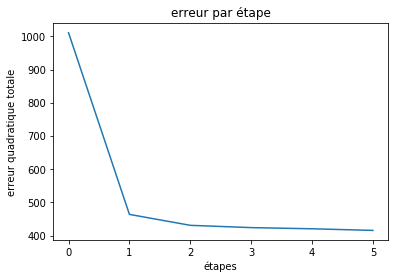

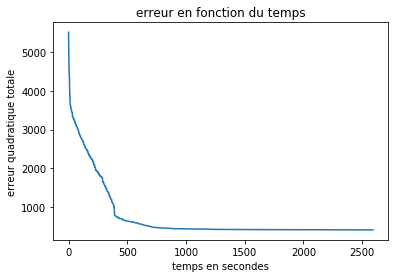

Pour  5 facteurs latents :
perte =  319.35519616620707
temps d'execution :  2973.633647441864 secondes.


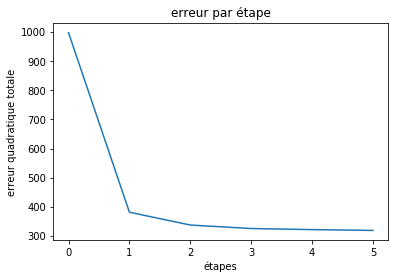

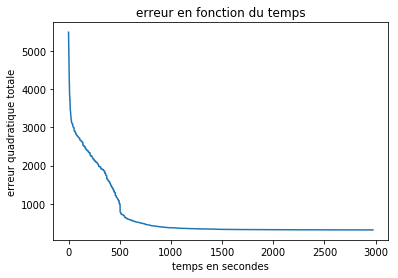

Pour  6 facteurs latents :
perte =  252.59207150971937
temps d'execution :  3561.0006268024445 secondes.


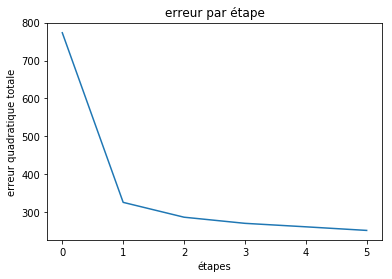

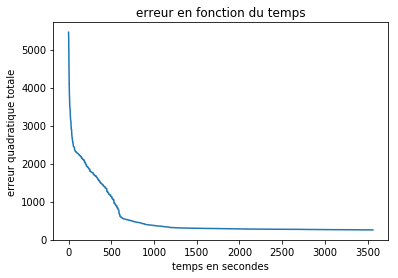

Pour  7 facteurs latents :
perte =  164.37043165720334
temps d'execution :  4124.416988134384 secondes.


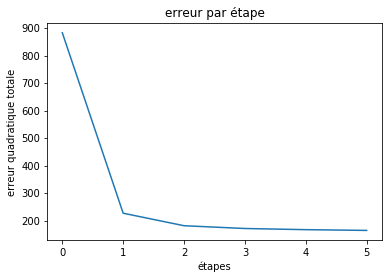

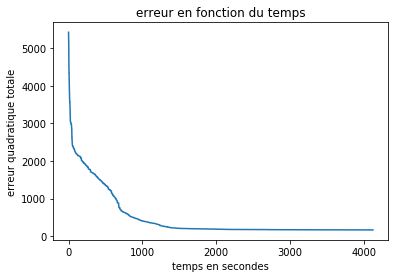

Pour  8 facteurs latents :
perte =  101.45780960187344
temps d'execution :  5680.649105548859 secondes.


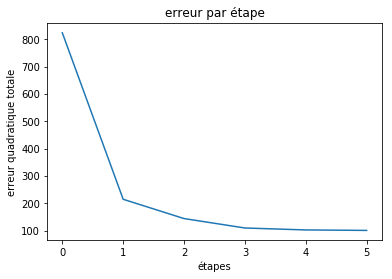

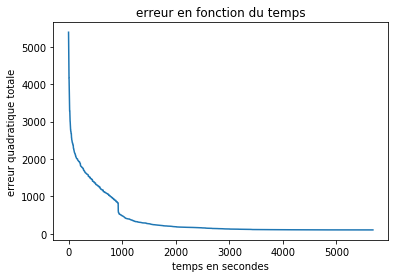

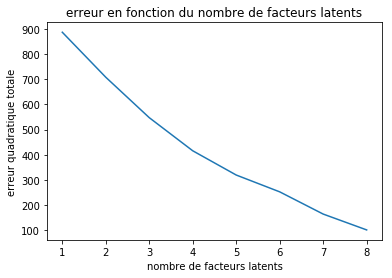

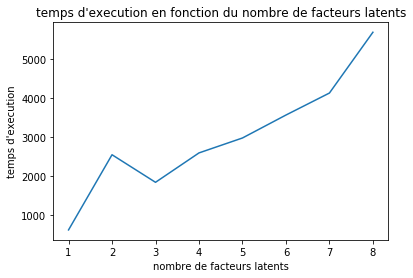

In [9]:
M=rd.randint(1,6,(50,10))
print(M)
iter=6
pas=.1
eps=.01
erreur, temps, l=[],[],[]
for latent in range (1,9):
    print("Pour " , latent, "facteurs latents :")
    dict=mon_idee(M,latent,iter,pas,eps,True)
    l.append(latent)
    erreur.append(dict.get("erreur"))
    temps.append(dict.get("temps"))

plt.plot(l,erreur)
plt.title("erreur en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("erreur quadratique totale")
plt.show()

plt.plot(l,temps)
plt.title("temps d'execution en fonction du nombre de facteurs latents")
plt.xlabel("nombre de facteurs latents")
plt.ylabel("temps d'execution")
plt.show()

## Amelioration temporelle énorme

Vu la très (trop) grande précision pour l'exemple pécédant, on se dit qu'on peut diminuer le nombre total d'étapes (iter) et les nombres d'étapes intermédiaires (e et ee)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import time


def S(y,x, a):
    return float((y-a.dot(x.T))**2)


def gradS(y,x, a):
    S = []
    for p in range(a.size):
        aux = 0
        aux -= float(x[0][p]) * (y - float(a.dot(x.T)))
        S.append(aux)
    return S


def perte_quadr(M, MM):
    p = 0
    n, m = M.shape
    for i in range(n):
        for j in range(m):
            p += (M[i][j] - MM[i][j]) ** 2
    return p

def perte_rapide(M,MM,i,j):
    p = 0
    n, m = M.shape
    for ligne in range(n):
        p+=(M[ligne][j] - MM[ligne][j]) ** 2
    for colonne in range(m):
        p+=(M[i][colonne] - MM[i][colonne]) ** 2
    return p


pas = .1
eps = 0.01
iter=10
l=11 #facteurs latents



def mon_idee(M, l, iter, pas, eps, courbes_seulement):
    # le paramètre courbe_seulement c'est si on veut afficher toutes les étapes ou juste les courbes pour comparer les résultats
    etape, perte_etape, temps, perte_temps = [], [], [], []

    MAT_U = np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V = np.array([[.1 for k in range(l)] for k in range(M.shape[1])])
    L1 = [k for k in range(M.shape[0])]
    L2 = [k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)

    if (courbes_seulement == False):
        print("Matrice à factoriser :")
        print(M)

    debut = time.time()

    for ww in range(iter):
        pas /= 1.1

        for n in L1:
            for m in L2:

                a = float(M[n][m])
                U = MAT_U[n:n + 1]
                V = MAT_V[m:m + 1]
                e, ee = 0, 0

                # On minismise sur V à U constant
                while e<10:
                    gradient = gradS(a, U, V)
                    if (max(gradient) < eps) and (min(gradient) > -eps):
                        break
                    e += 1
                    for i in range(l):
                        p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        grad = gradient[i]
                        V[0][i] -= pas * grad
                        p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        if (p1 < p2):
                            V[0][i] += pas * grad


                MAT_V[m] = V

                # On minimise sur U à V constant
                while ee<10:
                    gradient = gradS(a, U, V)
                    if (max(gradient) < eps) and (min(gradient) > -eps):
                        break
                    ee += 1
                    for i in range(l):
                        p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        grad = gradient[i]
                        U[0][i] -= pas * grad
                        p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        if (p1 < p2):
                            U[0][i] += pas * grad

                MAT_U[n] = U

        if (courbes_seulement == False):
            print("etape", ww + 1, "sur", iter)
        etape.append(ww)
        perte=perte_quadr(M, MAT_U.dot(MAT_V.T))
        perte_etape.append(perte)
        temps.append(time.time() - debut)
        perte_temps.append(perte)

    fin = time.time()
    if (courbes_seulement == False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM = MAT_U.dot(MAT_V.T)
    print("perte = ", perte_quadr(M, MM))
    print("temps d'execution : ", fin - debut, "secondes.")
    plt.plot(etape, perte_etape)
    plt.title("erreur par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    plt.plot(temps, perte_temps)
    plt.title("erreur en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    # pour l'étude de l'impact des paramètres :
    if (courbes_seulement == True):
        return {"temps": fin - debut, "erreur": perte_quadr(M, MM)}

Matrice à factoriser :
[[5 2 1 2 5 4 4 2 2 4]
 [4 5 4 2 4 5 1 3 4 3]
 [4 1 4 3 2 1 2 3 3 2]
 [4 4 3 1 4 2 5 2 4 3]
 [1 3 3 1 5 1 3 4 3 1]
 [2 5 2 4 3 1 2 3 4 1]
 [2 1 2 5 3 3 1 1 2 5]
 [3 2 4 3 5 2 5 5 5 5]
 [1 3 1 4 3 5 5 2 5 5]
 [3 4 1 4 2 3 2 3 5 4]
 [3 1 5 3 2 4 5 5 4 1]
 [5 5 4 5 5 1 4 2 2 4]
 [4 3 5 1 5 1 5 2 1 5]
 [5 3 2 1 3 4 3 4 4 3]
 [4 1 3 2 1 2 2 5 5 4]
 [1 3 2 1 3 3 3 2 2 1]
 [4 2 2 3 1 4 3 2 3 4]
 [3 5 3 3 2 2 2 5 1 3]
 [1 3 5 4 1 4 3 5 3 2]
 [4 3 5 1 5 5 3 2 2 1]
 [4 4 1 2 3 1 3 1 5 3]
 [4 1 3 5 4 5 5 1 3 1]
 [3 1 5 5 2 5 4 4 3 2]
 [2 1 3 5 5 4 2 4 1 1]
 [2 2 1 1 2 5 2 3 1 1]
 [4 1 5 3 1 3 1 1 4 4]
 [1 5 4 1 1 4 3 5 1 1]
 [3 1 4 3 4 5 5 2 5 5]
 [4 3 1 1 4 5 1 1 1 3]
 [5 4 3 5 4 4 3 5 5 5]
 [2 3 1 3 1 1 3 1 5 2]
 [4 2 4 5 3 1 3 2 5 1]
 [5 4 2 1 2 3 1 2 5 5]
 [4 3 1 3 4 3 4 3 5 1]
 [1 5 2 3 4 4 4 5 1 1]
 [1 5 1 5 2 3 3 3 4 4]
 [4 3 2 4 4 3 5 3 4 5]
 [2 4 1 5 1 5 2 3 5 2]
 [4 4 1 1 3 5 3 1 4 1]
 [1 3 3 4 2 5 2 5 2 5]
 [5 2 5 4 4 3 3 4 3 4]
 [1 3 3 2 5 1 3 5 2 1]
 [3 3 3 5 3

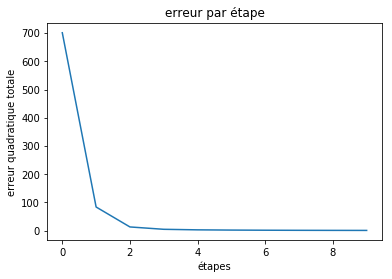

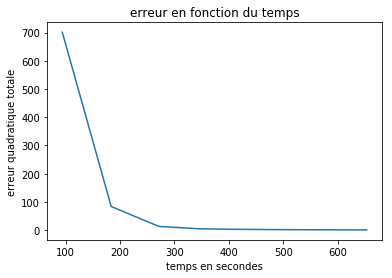

In [3]:
M2=rd.randint(1,6,(50,10))
mon_idee(M2,l+1,iter,pas,eps,False)

## Matrice creuse de grande taille : nouvelles amélioration et tests

On note par 0 une note non renseignée et on modifie alors la fonction "mon_idée" pour qu'elle ne prenne pas en compte ces coefficients, tout comme les fonctions de perte.
On se rapproche donc des cas réels sans ajouter de complexité à l'algorithme donéée plus haut.

In [6]:
def S(y,x, a):
    return float((y-a.dot(x.T))**2)


def gradS(y,x, a):
    S = []
    for p in range(a.size):
        aux = 0
        aux -= float(x[0][p]) * (y - float(a.dot(x.T)))
        S.append(aux)
    return S


def perte_quadr(M, MM):
    p = 0
    n, m = M.shape
    for i in range(n):
        for j in range(m):
            if M[i][j]==0:
                continue    # on ne considère que la perte sur le train , c'est à dire sur les facteurs deja rempli
            p += (M[i][j] - MM[i][j]) ** 2
    return p

def perte_rapide(M,MM,i,j):
    p = 0
    n, m = M.shape
    for ligne in range(n):
        if M[ligne][j]==0:   #de meme
            continue
        p+=(M[ligne][j] - MM[ligne][j]) ** 2
    for colonne in range(m):
        if M[i][colonne]==0:   #de meme
            continue
        p+=(M[i][colonne] - MM[i][colonne]) ** 2
    return p


pas = .1
eps = 0.01
iter=15
l=9 #facteurs latents



def mon_idee_creuse(M, l, iter, pas, eps, courbes_seulement):

    etape, perte_etape, temps, perte_temps = [], [], [], []

    MAT_U = np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V = np.array([[.1 for k in range(l)] for k in range(M.shape[1])])
    L1 = [k for k in range(M.shape[0])]
    L2 = [k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)

    if (courbes_seulement == False):
        print("Matrice à factoriser :")
        print(M)

    debut = time.time()

    for ww in range(iter):
        pas /= 1.1

        for n in L1:
            for m in L2:
                if M[n][m]==0:   #on saute les coefficients nuls
                    continue

                a = float(M[n][m])
                U = MAT_U[n:n + 1]
                V = MAT_V[m:m + 1]
                e, ee = 0, 0

                # On minismise sur V à U constant
                while e<10:
                    gradient = gradS(a, U, V)
                    if (max(gradient) < eps) and (min(gradient) > -eps):
                        break
                    e += 1
                    for i in range(l):
                        p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        grad = gradient[i]
                        V[0][i] -= pas * grad
                        p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        if (p1 < p2):
                            V[0][i] += pas * grad


                MAT_V[m] = V

                # On minimise sur U à V constant
                while ee<10:
                    gradient = gradS(a, U, V)
                    if (max(gradient) < eps) and (min(gradient) > -eps):
                        break
                    ee += 1
                    for i in range(l):
                        p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        grad = gradient[i]
                        U[0][i] -= pas * grad
                        p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                        if (p1 < p2):
                            U[0][i] += pas * grad

                MAT_U[n] = U

        if (courbes_seulement == False):
            print("etape", ww + 1, "sur", iter)
        etape.append(ww)
        perte=perte_quadr(M, MAT_U.dot(MAT_V.T))
        perte_etape.append(perte)
        temps.append(time.time() - debut)
        perte_temps.append(perte)

    fin = time.time()
    if (courbes_seulement == False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM = MAT_U.dot(MAT_V.T)
    print("perte = ", perte_quadr(M, MM))
    print("temps d'execution : ", fin - debut, "secondes.")
    plt.plot(etape, perte_etape)
    plt.title("erreur par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    plt.plot(temps, perte_temps)
    plt.title("erreur en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    # pour l'étude de l'impact des paramètres :
    if (courbes_seulement == True):
        return {"temps": fin - debut, "erreur": perte_quadr(M, MM)}


On prend pour tester une matrice $40\times 100$ soit $4000$ éléments. Avec $90$% de vide.

Matrice à factoriser :
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
etape 1 sur 15
etape 2 sur 15
etape 3 sur 15
etape 4 sur 15
etape 5 sur 15
etape 6 sur 15
etape 7 sur 15
etape 8 sur 15
etape 9 sur 15
etape 10 sur 15
etape 11 sur 15
etape 12 sur 15
etape 13 sur 15
etape 14 sur 15
etape 15 sur 15
[[5.04140615 4.51231352 4.9205408  ... 0.83664966 0.98790133 1.01725547]
 [0.86706085 1.07754864 0.97349111 ... 5.06208215 5.02395314 0.9578069 ]
 [5.15918451 4.67090008 5.03071228 ... 1.02508682 0.8589508  1.06379654]
 ...
 [1.05991277 1.22707549 1.00574332 ... 5.05776368 4.99741406 0.99083749]
 [4.87423462 4.43887226 4.78888125 ... 0.86342096 0.78072197 0.99544046]
 [1.63577877 1.17334651 1.37537274 ... 4.37063345 4.34304547 1.03283228]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
perte =  0.11667401853101281
temps d'execution :  191.16994905

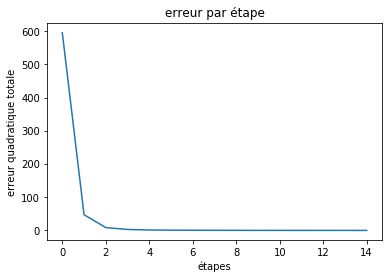

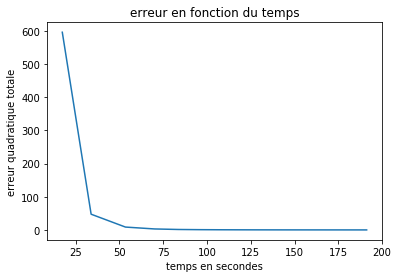

In [7]:
#pour voir si je devine bien, il faut qu'il y ait une logique dans la matrice initiale!
#Prenons ma matrice avec que de 1, des 5 et des non notés

MATRICE_NOTE = []
for j in range(20):
    L=[5 for k in range(50)]+ [1 for k in range(50)]
    M=[1 for k in range(50)]+[5 for k in range(50)]
    MATRICE_NOTE.append(L)
    MATRICE_NOTE.append(M)

M=np.array(MATRICE_NOTE)
M_lac=M

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        x=rd.random()
        if x<.9:
            M_lac[i][j]=0

mon_idee_creuse(M,l,iter,pas,eps,False)

On remarque d'une part que la perte totale sur les coefficients non vides (perte sur l'echantillon d'entrainement) est d'environ $0,1$ soit une perte moyenne très faible.
D'autre part, cette matrice d'essaie est un cas limite et la matrice résultat correspond à une prédiction censée, alors même que nous n'avons pas introduit de facteur de régulation!
Cela amène à la partie suivante : découper la matrice en entrée en une partie pour l'entrainement et une partie pour le test! Avec courbe d'erreur dans les deux cas.
Cela va montrer la nécéssité des facteurs de régulation! (je pense)

## Que donne notre algorithme sur de vraies données?

Utilisation d'un dataset de Kaggle provenant d'un restaurant et donnant les notes des clients pour différents plats et différents critères.


In [7]:
import pandas as pd

dataset = pd.read_csv("datatset_restaurant.csv")
print(dataset.head())

  userID  placeID  rating  food_rating  service_rating
0  U1077   135085       2            2               2
1  U1077   135038       2            2               1
2  U1077   132825       2            2               2
3  U1077   135060       1            2               2
4  U1068   135104       1            1               2


### Convertir en une matrice exploitable pour mon algo (pas évident)

In [35]:
def to_matrice(dataset):
    # marche pour un dataset avec notes entre 0 et note max
    # à adapter sinon
    
    user = dataset.iloc[:, 0]
    item = dataset.iloc[:, 1]

    utile = dataset.iloc[:, 0:3]
    data_array = utile.get_values()  # to_numpy devient get_values sur python 3

    user_dict = {}
    for k in range(data_array.shape[0]):
        user_dict[data_array[k][0]] = data_array[k][1]
    nb_user = len(user_dict)

    item_dict = {}
    for k in range(data_array.shape[0]):
        item_dict[data_array[k][1]] = data_array[k][0]
    nb_item = len(item_dict)

    nb_ratings = data_array.shape[0]
    pourc = round(100 * nb_ratings / (nb_user * nb_item), 2)

    print("Il y a ", nb_user, " utilisateurs et ", nb_item, "plats et ", nb_ratings, "notes, soit une matrice ", pourc,
          "% pleine.")

    # Matrice note

    # on commence par remplir une matrice avec que des zeros ou des -1, à voir
    M = np.zeros((nb_user, nb_ratings))

    # Il faut maintenant réindexer
    # Stratégie :

    index = 0
    for cle in user_dict.keys():
        user_dict[cle] = index
        index += 1

    index = 0
    for cle in item_dict.keys():
        item_dict[cle] = index
        index += 1

    for x in data_array:
        user = user_dict.get(x[0])
        item = item_dict.get(x[1])
        rating = x[2]
        M[user][item] = rating + 1  # je fais donc des notes de 1 à 3 et on laisse 0 pour les non notés

    return M

In [33]:
print(to_matrice(dataset))

Il y a  138  utilisateurs et  130 plats et  1161 notes, soit une matrice  6.47 % pleine.
[[4. 4. 4. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


On peut donc utiliser notre algorithme amélioré de ci-dessus:

On commence par une matrice extraite de la grosse:

In [30]:
M_petite=M[:70,:70]
nb_notes= 0
for i in range (M_petite.shape[0]):
    for j in range (M_petite.shape[1]):
        if M[i][j]!=0:
            nb_notes+=1

print ("nombre de notes de la petite matrice : ", nb_notes)

nombre de notes de la petite matrice :  249


Matrice à factoriser :
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
etape 1 sur 15
etape 2 sur 15
etape 3 sur 15
etape 4 sur 15
etape 5 sur 15
etape 6 sur 15
etape 7 sur 15
etape 8 sur 15
etape 9 sur 15
etape 10 sur 15
etape 11 sur 15
etape 12 sur 15
etape 13 sur 15
etape 14 sur 15
etape 15 sur 15
[[3.01723018 2.98263997 3.00157877 ... 2.42204807 3.28438478 3.1494396 ]
 [2.10606943 2.48817136 2.02750647 ... 1.69429787 2.37054389 2.35126998]
 [3.14094045 2.78929201 3.00365691 ... 2.26003885 3.01055999 2.7374342 ]
 ...
 [1.40736017 1.47960699 0.94540227 ... 1.09161775 1.46218294 1.35295293]
 [3.03714559 2.77814115 2.58475125 ... 2.36174331 3.12527227 2.76385057]
 [1.02127432 0.95879152 1.01352858 ... 0.80339605 1.08487296 1.02405961]]
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0

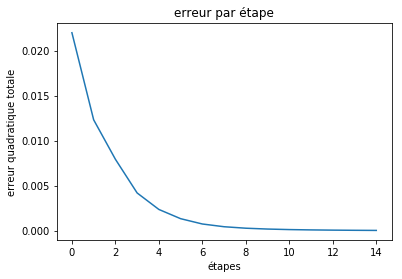

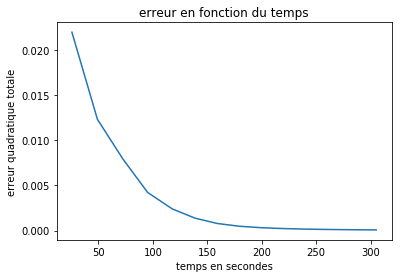

In [12]:
mon_idee_creuse(M_petite,l,iter,pas,eps,False)

(En 200 secondes sur pycharm donc on peut essayer la grosse matrice)

Vraiment trop long sur une grosse matrice : le pb c que on itère là ou ya des 0 et ça fait qd meme perdre du temps.
Ca fait un $O(iter\times user\times item)$ en terme de comparaisons! 
Donc pour une matrice $70\times 70$ ca fait $30 000$ ca va mais pour du $200 \times 200$ ca fait $400 000$ comparaisons, c'est peut-etre trop.
Solution? Dans le prétraitement, trouver les emplacements avec un zéros et ne JAMAIS les considérer, même dans le calcul de la perte!

Idée pour améliorer la fonction : iterer que sur les paires non nulle! ; gain de temps : fonction changée: on enleve les 0 au début et on travaille uniquement sur les paires $(n,m)$ telles que $M(n,m)\neq 0$ au lieu de vérifier cela a chaque itération!

In [9]:
def mon_idee_creuse_rapide(M, l, iter, pas, eps, courbes_seulement):
    # le paramètre courbe_seulement c'est si on veut afficher toutes les étapes ou juste les courbes pour comparer les résultats
    etape, perte_etape, temps, perte_temps = [], [], [], []

    MAT_U = np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V = np.array([[.1 for k in range(l)] for k in range(M.shape[1])])
    L1 = [k for k in range(M.shape[0])]
    L2 = [k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)

    #enlever les zeros
    paires=[]
    for i in L1:
        for j in L2:
            if M[i][j]!=0:
                paires.append((i,j))

    if (courbes_seulement == False):
        print("Matrice à factoriser :")
        print(M)

    debut = time.time()

    for ww in range(iter):
        pas /= 1.1

        for paire in paires:
            n,m = paire
            a = float(M[n][m])
            U = MAT_U[n:n + 1]
            V = MAT_V[m:m + 1]
            e, ee = 0, 0

            # On minismise sur V à U constant
            while e<10:
                gradient = gradS(a, U, V)
                if (max(gradient) < eps) and (min(gradient) > -eps):
                    break
                e += 1
                for i in range(l):
                    p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    grad = gradient[i]
                    V[0][i] -= pas * grad
                    p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    if (p1 < p2):
                        V[0][i] += pas * grad


            MAT_V[m] = V
                # On minimise sur U à V constant
            while ee<10:
                gradient = gradS(a, U, V)
                if (max(gradient) < eps) and (min(gradient) > -eps):
                    break
                ee += 1
                for i in range(l):
                    p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    grad = gradient[i]
                    U[0][i] -= pas * grad
                    p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    if (p1 < p2):
                        U[0][i] += pas * grad

            MAT_U[n] = U

        if (courbes_seulement == False):
            print("etape", ww + 1, "sur", iter)
        etape.append(ww)
        perte=perte_quadr(M, MAT_U.dot(MAT_V.T))
        perte_etape.append(perte)
        temps.append(time.time() - debut)
        perte_temps.append(perte)

    fin = time.time()
    if (courbes_seulement == False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM = MAT_U.dot(MAT_V.T)
    print("perte = ", perte_quadr(M, MM))
    print("temps d'execution : ", fin - debut, "secondes.")
    plt.plot(etape, perte_etape)
    plt.title("erreur par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    plt.plot(temps, perte_temps)
    plt.title("erreur en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    # pour l'étude de l'impact des paramètres :
    if (courbes_seulement == True):
        return {"temps": fin - debut, "erreur": perte_quadr(M, MM)}

Matrice à factoriser :
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
etape 1 sur 15
etape 2 sur 15
etape 3 sur 15
etape 4 sur 15
etape 5 sur 15
etape 6 sur 15
etape 7 sur 15
etape 8 sur 15
etape 9 sur 15
etape 10 sur 15
etape 11 sur 15
etape 12 sur 15
etape 13 sur 15
etape 14 sur 15
etape 15 sur 15
[[3.01189164 2.97876328 3.01843765 ... 2.41389075 3.30792465 3.08370583]
 [2.10490965 2.20347607 2.12769217 ... 1.67765843 2.29000266 2.06354139]
 [2.13559494 2.32913586 3.01240827 ... 2.1358128  3.00538224 3.28013872]
 ...
 [1.40999027 1.43193489 0.98159013 ... 1.11047782 1.44770261 1.30182263]
 [3.01780162 2.57968343 2.39989359 ... 2.16548027 2.90220361 2.53784047]
 [1.00947618 0.96420784 0.99076099 ... 0.79607565 1.08786435 1.00344384]]
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0

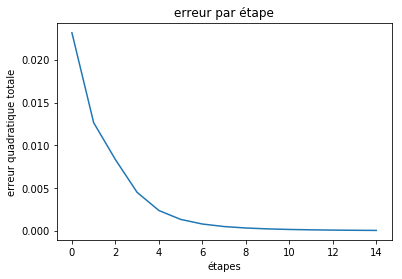

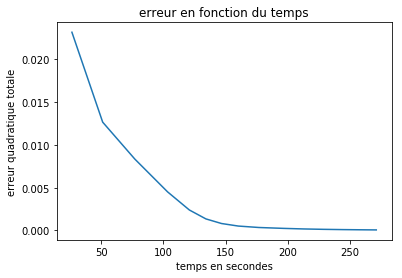

In [14]:
mon_idee_creuse_rapide(M_petite,l,iter,pas,eps,False)

On peut encore améliorer en changeant les parametres internes de la fonction

In [10]:
def mon_idee_creuse_tres_rapide(M, l, iter, pas, eps, courbes_seulement):
    # le paramètre courbe_seulement c'est si on veut afficher toutes les étapes ou juste les courbes pour comparer les résultats
    etape, perte_etape, temps, perte_temps = [], [], [], []

    MAT_U = np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V = np.array([[.1 for k in range(l)] for k in range(M.shape[1])])
    L1 = [k for k in range(M.shape[0])]
    L2 = [k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)

    #enlever les zeros
    paires=[]
    for i in L1:
        for j in L2:
            if M[i][j]!=0:
                paires.append((i,j))

    if (courbes_seulement == False):
        print("Matrice à factoriser :")
        print(M)

    debut = time.time()

    for ww in range(iter-5):
        pas /= 1.1

        for paire in paires:
            n,m = paire
            a = float(M[n][m])
            U = MAT_U[n:n + 1]
            V = MAT_V[m:m + 1]
            e, ee = 0, 0

            # On minismise sur V à U constant
            while e<3:
                gradient = gradS(a, U, V)
                #if (max(gradient) < eps) and (min(gradient) > -eps):
                    #break
                e += 1
                for i in range(l):
                    p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    grad = gradient[i]
                    V[0][i] -= pas * grad
                    p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    if (p1 < p2):
                        V[0][i] += pas * grad


            MAT_V[m] = V
                # On minimise sur U à V constant
            while ee<3:
                gradient = gradS(a, U, V)
                #if (max(gradient) < eps) and (min(gradient) > -eps):
                    #break
                ee += 1
                for i in range(l):
                    p1 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    grad = gradient[i]
                    U[0][i] -= pas * grad
                    p2 = perte_rapide(M, MAT_U.dot(MAT_V.T),n,m)
                    if (p1 < p2):
                        U[0][i] += pas * grad

            MAT_U[n] = U

        if (courbes_seulement == False):
            print("etape", ww + 1, "sur", iter)
        etape.append(ww)
        perte=perte_quadr(M, MAT_U.dot(MAT_V.T))
        perte_etape.append(perte)
        temps.append(time.time() - debut)
        perte_temps.append(perte)

    fin = time.time()
    if (courbes_seulement == False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM = MAT_U.dot(MAT_V.T)
    print("perte = ", perte_quadr(M, MM))
    print("temps d'execution : ", fin - debut, "secondes.")
    plt.plot(etape, perte_etape)
    plt.title("erreur par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    plt.plot(temps, perte_temps)
    plt.title("erreur en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale")
    plt.show()

    # pour l'étude de l'impact des paramètres :
    if (courbes_seulement == True):
        return {"temps": fin - debut, "erreur": perte_quadr(M, MM)}

Matrice à factoriser :
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [3. 2. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
etape 1 sur 15
etape 2 sur 15
etape 3 sur 15
etape 4 sur 15
etape 5 sur 15
etape 6 sur 15
etape 7 sur 15
etape 8 sur 15
etape 9 sur 15
etape 10 sur 15
[[2.88109657 3.07289632 3.01693961 ... 2.34271696 1.30656834 0.65326528]
 [2.24757438 2.73407589 1.91225579 ... 1.95408466 1.04022292 0.52009649]
 [2.30124705 2.70756129 3.13210667 ... 2.32237152 1.2988111  0.64938676]
 ...
 [2.00291006 2.29290833 1.90616028 ... 1.93468118 1.03653117 0.51825076]
 [3.02140844 2.40255328 2.94016295 ... 2.22427145 1.18938502 0.59467538]
 [2.79771347 3.1988892  2.85825169 ... 2.45939282 1.35202396 0.67599249]]
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [3. 2. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
perte =  9.260084310119977
temps d'execution :  28.306362628936768 sec

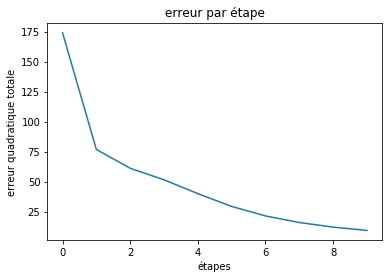

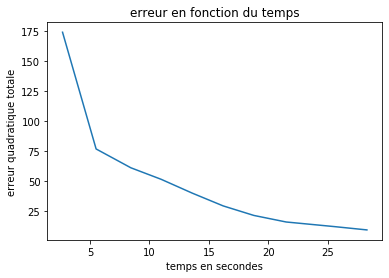

In [48]:
mon_idee_creuse_tres_rapide(M_petite,l,iter,pas,eps,False)

## Train and Test et régularistation 

In [11]:
#from sklearn.model_selection import train_test_split

In [12]:
"""def train_and_test(dataset,x):
    train, test = train_test_split(dataset, test_size=x)
    return (train, test)

def train_and_test_matrice(M, x):
    dataset=to_dataset(M)
    return train_and_test(dataset,x)"""

'def train_and_test(dataset,x):\n    train, test = train_test_split(dataset, test_size=x)\n    return (train, test)\n\ndef train_and_test_matrice(M, x):\n    dataset=to_dataset(M)\n    return train_and_test(dataset,x)'

In [34]:
def train_and_test(M,x):
    train=np.zeros(M.shape)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            r = rd.random()
            if r >= x:
                train[i][j]=M[i][j]
    test=M-train
    return train, test

In [33]:
pas = .1
eps = 0.01
iter=8
l=12 #facteurs latents

In [13]:
def mon_idee_train_test(M, l, iter, pas, eps, courbes_seulement,taille_test):

    train, test = train_and_test(M,taille_test)

    etape, perte_train_etape,perte_test_etape, temps, perte_train_temps, perte_test_temps = [], [], [], [], [],[]

    MAT_U = np.array([[.1 for k in range(l)] for k in range(M.shape[0])])
    MAT_V = np.array([[.1 for k in range(l)] for k in range(M.shape[1])])
    L1 = [k for k in range(M.shape[0])]
    L2 = [k for k in range(M.shape[1])]
    rd.shuffle(L1)
    rd.shuffle(L2)

    # enlever les zeros sur le train, M doit rester intacte!!!
    paires = []
    for i in L1:
        for j in L2:
            if train[i][j] != 0:
                paires.append((i, j))

    if (courbes_seulement == False):
        print("Matrice à factoriser :")
        print(M)

    debut = time.time()

    for ww in range(iter):
        pas /= 1.1

        for paire in paires:
            n, m = paire
            a = float(M[n][m])
            U = MAT_U[n:n + 1]
            V = MAT_V[m:m + 1]
            e, ee = 0, 0

            # On minismise sur V à U constant
            while e < 10:
                gradient = gradS(a, U, V)
                if (max(gradient) < eps) and (min(gradient) > -eps):
                    break
                e += 1
                for i in range(l):
                    p1 = perte_rapide(train, MAT_U.dot(MAT_V.T), n, m)
                    grad = gradient[i]
                    V[0][i] -= pas * grad
                    p2 = perte_rapide(train, MAT_U.dot(MAT_V.T), n, m)
                    if (p1 < p2):
                        V[0][i] += pas * grad

            MAT_V[m] = V
            # On minimise sur U à V constant
            while ee < 10:
                gradient = gradS(a, U, V)
                if (max(gradient) < eps) and (min(gradient) > -eps):
                    break
                ee += 1
                for i in range(l):
                    p1 = perte_rapide(train, MAT_U.dot(MAT_V.T), n, m)
                    grad = gradient[i]
                    U[0][i] -= pas * grad
                    p2 = perte_rapide(train, MAT_U.dot(MAT_V.T), n, m)
                    if (p1 < p2):
                        U[0][i] += pas * grad

            MAT_U[n] = U

        if (courbes_seulement == False):
            print("etape", ww + 1, "sur", iter)
        etape.append(ww)
        perte_train = perte_quadr(train, MAT_U.dot(MAT_V.T))
        perte_test=perte_quadr(test, MAT_U.dot(MAT_V.T))
        perte_train_etape.append(perte_train)
        perte_test_etape.append(perte_test)
        temps.append(time.time() - debut)
        perte_train_temps.append(perte_train)
        perte_test_temps.append(perte_test)

    fin = time.time()
    if (courbes_seulement == False):
        print(MAT_U.dot(MAT_V.T))
        print(M)
    MM = MAT_U.dot(MAT_V.T)
    #print("perte = ", perte_quadr(M, MM))
    print("temps d'execution : ", fin - debut, "secondes.")
    plt.plot(etape, perte_train_etape)
    plt.title("erreur sur l'entrainement par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale sur l'entrainement")
    plt.show()
    plt.plot(etape, perte_test_etape)
    plt.title("erreur sur le test par étape")
    plt.xlabel("étapes")
    plt.ylabel("erreur quadratique totale sur le test")
    plt.show()

    plt.plot(temps, perte_train_temps)
    plt.title("erreur d'entrainement en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale sur l'entrainement")
    plt.show()
    plt.plot(temps, perte_test_temps)
    plt.title("erreur de test en fonction du temps")
    plt.xlabel("temps en secondes")
    plt.ylabel("erreur quadratique totale sur le test")
    plt.show()

    # pour l'étude de l'impact des paramètres :
    if (courbes_seulement == True):
        return {"temps": fin - debut, "erreur": perte_quadr(M, MM)}

Matrice à factoriser :
[[4 2 4 3 5 4 2 3 5 4 1 3]
 [3 2 4 2 3 4 4 3 3 5 4 4]
 [4 5 2 3 3 3 4 2 2 1 5 2]
 [3 3 4 2 2 1 2 1 4 2 5 4]
 [1 3 2 1 3 5 4 2 1 2 5 3]
 [4 2 2 3 5 5 4 4 2 1 1 4]]
etape 1 sur 8
etape 2 sur 8
etape 3 sur 8
etape 4 sur 8
etape 5 sur 8
etape 6 sur 8
etape 7 sur 8
etape 8 sur 8
[[4.00484462 1.97713291 4.49728946 2.904237   4.98459974 5.44978446
  2.04041595 3.51684048 4.95682422 4.00318326 5.70694992 3.08058507]
 [3.04227628 1.95018447 4.02480462 2.61251633 3.02882376 4.01507846
  3.97749918 2.9601486  2.91563569 5.01626086 4.05031933 4.03579652]
 [4.01522814 4.98570596 2.00582646 2.99376006 3.00536508 3.00841011
  3.99921205 1.9874252  1.98610089 0.9889717  5.0035543  2.0385543 ]
 [2.98850041 3.00705842 3.98587668 2.31497308 1.98812142 3.9753607
  2.00699115 1.00625869 4.02361571 6.02123754 4.99735767 3.99103787]
 [1.00636721 3.00088545 2.60617119 0.99387818 3.00561696 4.99956443
  2.03279194 1.99989571 2.24585217 1.99412628 4.9935827  2.99822934]
 [3.98117393 2.023

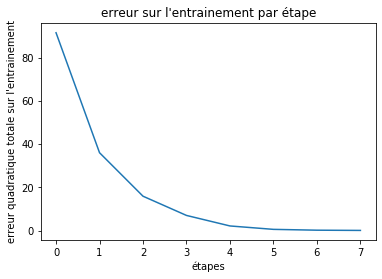

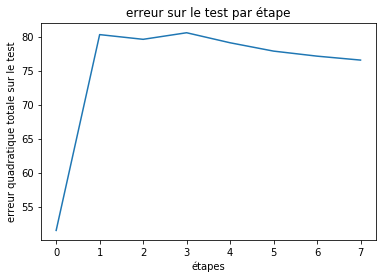

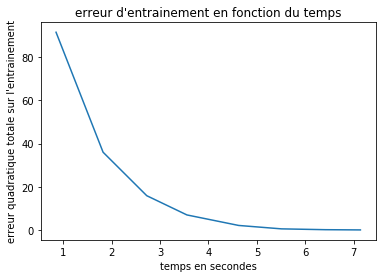

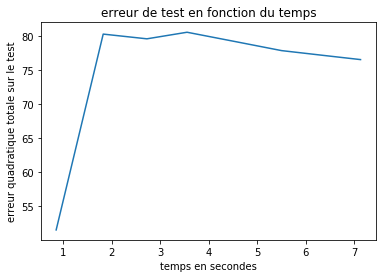

In [14]:
M=rd.randint(1,6,(6,12))

mon_idee_train_test(M,l,iter,pas,eps,False,.20)

Remarques : 

L'erreur sur l'ensemble d'entrainement devient très faible, cela confirme que notre algorithme arrive à bien factoriser une matrice.

L'erreur sur le test est plus forte et ne diminue pas, il y a deux causes: tout d'abord la matrice étudiée est une matrice aléatoire, et donc en approchant les facteurs d'entrainement, il n'y a aucune raison d'approcher les facteurs de l'ensemble de test (la matrice ne répond à aucune logique). L'autre raison, que nous allons mettre en valeur dans l'exemple suivant est ce que l'on appelle le sur-apprentissage : nous n'avons pas introduit de facteurs correctif donc on arrive à approcher très précisément l'ensemble d'entrainement, mais pas à généraliser!

(Pourquoi ca remonte? parceque l'initialisation est faite pour ne pas etre trop loin de toute valeur)

Pour montrer l'importance de ce 2ème point, nous allons cette fois prendre une matrice "cohérante", c'est à dire celle issue du dataset de Kaggle sur les données du restaurant (que nous tronquons pour accelerer l'experience)

In [15]:
dataset = pd.read_csv("datatset_restaurant.csv")
print(dataset.head())
M=to_matrice(dataset)
M=M[:60,:60]

  userID  placeID  rating  food_rating  service_rating
0  U1077   135085       2            2               2
1  U1077   135038       2            2               1
2  U1077   132825       2            2               2
3  U1077   135060       1            2               2
4  U1068   135104       1            1               2
Il y a  138  utilisateurs et  130 plats et  1161 notes, soit une matrice  6.47 % pleine.


Matrice à factoriser :
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [3. 2. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
etape 1 sur 8
etape 2 sur 8
etape 3 sur 8
etape 4 sur 8
etape 5 sur 8
etape 6 sur 8
etape 7 sur 8
etape 8 sur 8
[[2.93337478 3.30412254 3.06275055 ... 3.41233827 1.54094878 0.48569844]
 [2.86353396 3.23233599 3.05289085 ... 3.28114081 1.52746288 0.48144775]
 [2.35851055 2.84831613 3.1029491  ... 3.36905922 1.39424009 0.43945668]
 ...
 [2.15717379 2.72768522 2.00166235 ... 2.85975312 1.31777847 0.4153564 ]
 [1.29375938 2.04333618 2.97238985 ... 2.76412995 1.07581548 0.33909102]
 [3.16703954 3.69628102 3.55356648 ... 3.87780309 1.73635527 0.54728947]]
[[3. 3. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [3. 2. 3. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
temps d'execution :  66.91109728813171 secondes.


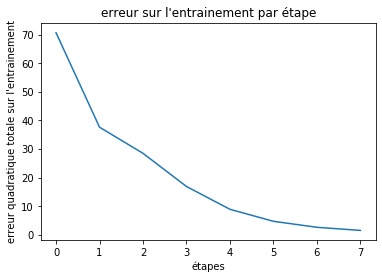

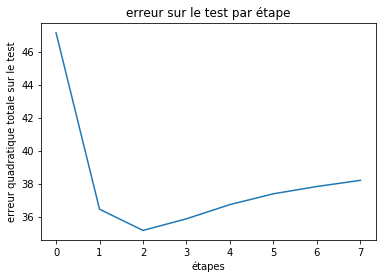

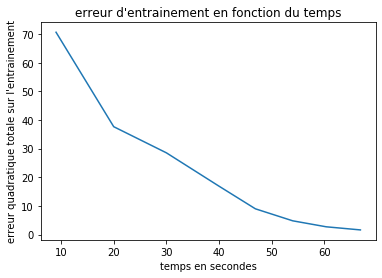

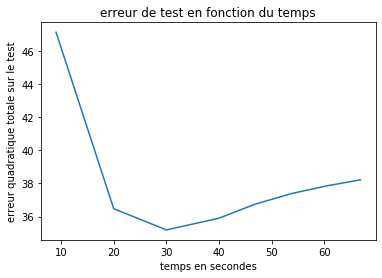

In [16]:
mon_idee_train_test(M,l,iter,pas,eps,False,.2)

On trouve bien ce à quoi on s'attendait : erreur sur le test presque nul mais mauvaise capacité à généraliser!